In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import manifold

In [15]:
data = datasets.fetch_openml(
    "mnist_784",
    version=1,
    return_X_y=True
)
type(data)

tuple

In [16]:
type(data[0]), type(data[1])

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [17]:
pixel_values, targets = data
targets = targets.astype(int)

In [18]:
pixel_values.shape, targets.shape

((70000, 784), (70000,))

In [28]:
pixel_values[0:1][:].shape

AttributeError: 'DataFrame' object has no attribute 'reshape'

In [30]:
np.array(pixel_values[0:1][:]).shape

(1, 784)

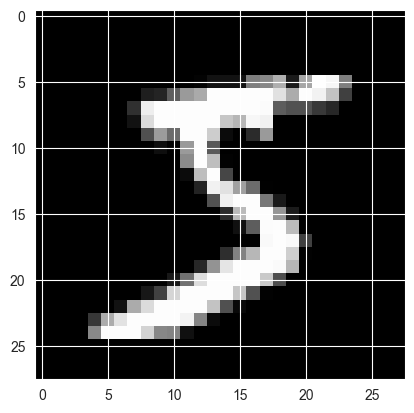

In [31]:
single_img = np.array(pixel_values[0:1][:]).reshape(28, 28)
plt.imshow(single_img, cmap="gray")

In [33]:
tsne = manifold.TSNE(n_components=2, random_state=42)
transformed_data = tsne.fit_transform(pixel_values[:3000][:])

In [35]:
transformed_data

array([[ 19.401257 ,  -8.696315 ],
       [ 56.945004 ,  -2.4144466],
       [  1.0100404, -54.631752 ],
       ...,
       [-30.720028 , -13.90004  ],
       [-26.847355 ,  43.660206 ],
       [ 11.009371 , -21.998615 ]], dtype=float32)

In [34]:
tsne_df = pd.DataFrame(
    np.column_stack((transformed_data, targets[:3000])),
    columns=["x", "y", "targets"]
)
tsne_df

,x,y,targets
0,19.401257,-8.696315,5.0
1,56.945004,-2.414447,0.0
2,1.010040,-54.631752,4.0
3,-42.368893,10.294485,1.0
4,-9.408126,-33.177006,9.0
...,...,...,...
2995,-35.515835,-25.984337,7.0
2996,51.492123,-4.996196,0.0
2997,-30.720028,-13.900040,9.0
2998,-26.847355,43.660206,1.0


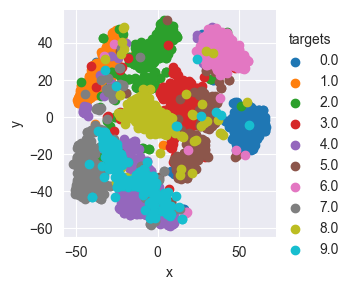

In [37]:
grid = sns.FacetGrid(tsne_df, hue="targets")
grid.map(plt.scatter, "x", "y").add_legend()

,x,y,targets
0,19.401257,-8.696315,5.0
1,56.945004,-2.414447,0.0
2,1.010040,-54.631752,4.0
3,-42.368893,10.294485,1.0
4,-9.408126,-33.177006,9.0
...,...,...,...
2995,-35.515835,-25.984337,7.0
2996,51.492123,-4.996196,0.0
2997,-30.720028,-13.900040,9.0
2998,-26.847355,43.660206,1.0
